In [1]:
from pandas import *
%matplotlib inline

In [15]:
LOCATION = 'comtrade.csv'

In [16]:
milk = read_csv(LOCATION, dtype={'Commodity Code':str})
milk.tail(2)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
641,HS,2015,201503,March 2015,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,290000,NaN,676375,NaN,NaN,0
642,HS,2015,201503,March 2015,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,2040,NaN,3575,NaN,NaN,0


In [17]:
def milkType(code):
    if code=='0401':
        return'unprocessed'
    if code=='0402':
        return'processed'
    return'unknown'

COMMODITY = 'Milk and cream'
milk[COMMODITY] =milk['Commodity Code'].apply(milkType)
MONTH ='Period'
PARTNER ='Partner'
FLOW ='Trade Flow'
VALUE ='Trade Value (US$)'
headings =[MONTH,PARTNER,FLOW,COMMODITY,VALUE]
milk =milk[headings]
milk.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
0,201505,World,Imports,unprocessed,14497413
1,201505,Belgium,Imports,unprocessed,657685
2,201505,Czech Rep.,Imports,unprocessed,232
3,201505,Denmark,Imports,unprocessed,2459139
4,201505,France,Imports,unprocessed,1114603


In [18]:
milk =milk[milk[PARTNER]!='World'] 
milk.head()

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
1,201505,Belgium,Imports,unprocessed,657685
2,201505,Czech Rep.,Imports,unprocessed,232
3,201505,Denmark,Imports,unprocessed,2459139
4,201505,France,Imports,unprocessed,1114603
5,201505,Germany,Imports,unprocessed,645384


TOTAL TRADE FLOW

In [19]:
grouped =milk.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Exports    267525521
Imports    160451147
Name: Trade Value (US$), dtype: int64

MAIN TRADE PARTNERS

In [20]:
imports = milk[milk[FLOW] =='Imports']
grouped = imports.groupby([PARTNER])
print('The UK imports from', len(grouped), 'countries.')
print('The 5 biggest exporters to the UK are:')
totalImports = grouped[VALUE].aggregate(sum).sort_values(inplace=False, ascending=False)
totalImports.head()

The UK imports from 22 countries.
The 5 biggest exporters to the UK are:


Partner
Ireland        47729692
France         28484766
Germany        22954774
Netherlands    18415687
Belgium        14303482
Name: Trade Value (US$), dtype: int64

BAR CHART

<AxesSubplot:ylabel='Partner'>

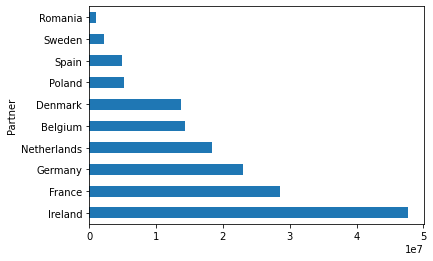

In [21]:
totalImports.head(10).plot(kind='barh')

In [22]:
exports = milk[milk[FLOW] =='Exports']
grouped = imports.groupby([PARTNER])
print('The UK exports from', len(grouped), 'countries.')
print('The 5 biggest importers to the UK are:')
grouped[VALUE].aggregate(sum).sort_values(inplace=False, ascending=False).head()

The UK exports from 22 countries.
The 5 biggest importers to the UK are:


Partner
Ireland        47729692
France         28484766
Germany        22954774
Netherlands    18415687
Belgium        14303482
Name: Trade Value (US$), dtype: int64

REGULAR IMPORTERS

In [23]:
def buysEveryMonth(group):
    return len(group) ==10

grouped = exports.groupby([PARTNER])
regular = grouped.filter(buysEveryMonth)
regular[(regular[MONTH]== 201501) & (regular[COMMODITY] =='processed')]

,Period,Partner,Trade Flow,Milk and cream,Trade Value (US$)
222,201501,Belgium,Exports,processed,142603
225,201501,China,Exports,processed,1013141
229,201501,Cyprus,Exports,processed,6601
232,201501,Denmark,Exports,processed,107883
256,201501,France,Exports,processed,178209
258,201501,Germany,Exports,processed,2588374
263,201501,"China, Hong Kong SAR",Exports,processed,1110086
264,201501,Hungary,Exports,processed,2119
267,201501,Ireland,Exports,processed,4020443
268,201501,Italy,Exports,processed,23256


In [24]:
regular[VALUE].sum()/exports[VALUE].sum()

0.7606021669984898

BI-DIRECTIONAL TRADE
'Which countries does the UK both import from and export to?', a pivot table is used to list the total export and import value for each country.

In [25]:
countries = pivot_table(milk,index=[PARTNER], columns=[FLOW], values=VALUE, aggfunc=sum)
countries.head()

Trade Flow,Exports,Imports
Partner,,
Algeria,8087885.0,NaN
Angola,2416129.0,NaN
Antigua and Barbuda,22218.0,NaN
"Areas, nes",51205.0,NaN
Australia,81644.0,NaN


In [26]:
countries.dropna()

Trade Flow,Exports,Imports
Partner,,
Austria,56160.0,780.0
Belgium,7215960.0,14303482.0
Czech Rep.,2590.0,487196.0
Denmark,337622.0,13681571.0
France,9394028.0,28484766.0
Germany,11393222.0,22954774.0
Hungary,71331.0,4762.0
Ireland,128205584.0,47729692.0
Italy,173015.0,320150.0
